In [26]:
import pyspark as ps
from pyspark.sql import SparkSession

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [3]:
spark = (ps.sql.SparkSession
        .builder
        .master('local[4]')
        .appName('rec_sprint')
        .getOrCreate())
sc = spark.sparkContext

In [4]:
ratings = pd.read_csv('training.csv')

In [5]:
ratings.head()

,user,movie,rating,timestamp
0,6040,858,4,956703932
1,6040,593,5,956703954
2,6040,2384,4,956703954
3,6040,1961,4,956703977
4,6040,2019,5,956703977


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 4 columns):
user         800000 non-null int64
movie        800000 non-null int64
rating       800000 non-null int64
timestamp    800000 non-null int64
dtypes: int64(4)
memory usage: 24.4 MB


In [7]:
requests = pd.read_csv('requests.csv')

In [8]:
requests.head()

,user,movie
0,4958,1924
1,4958,3264
2,4958,2634
3,4958,1407
4,4958,2399


In [41]:
users = pd.read_table('users.dat', sep = "::", header = None)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

In [42]:
users.head()

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### Movies EDA

In [93]:
movies = pd.read_table('movies.dat', sep = "::",engine = 'python', header = None)

In [94]:
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [95]:
movies.columns = ['User_Id', 'Movie_Title', 'Genre']

In [96]:
movies.head()

,User_Id,Movie_Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [97]:
movies['Movie_Title'].astype(list).tail()

3878       Meet the Parents (2000)
3879    Requiem for a Dream (2000)
3880              Tigerland (2000)
3881       Two Family House (2000)
3882         Contender, The (2000)
Name: Movie_Title, dtype: object

In [151]:
#Add year column from movie title
movies['Year'] = movies['Movie_Title'].apply(lambda x: x[-5:-1]).astype(int)

In [162]:
movies['Title'] = movies['Movie_Title'].apply(lambda x: x[: -6]).astype(str)

In [183]:
movies = movies.drop(['Movie_Title'], axis = 1).head()

### Genres

In [201]:
dummy_cols = pd.get_dummies(movies['Genre'],sep='|')

TypeError: get_dummies() got an unexpected keyword argument 'sep'

In [195]:
dummy_cols = pd.get_dummies(movies['Genre'])

In [ ]:
sep='|'

In [176]:
genres = movies.get_dummies(df["Genre"])[['Action', 'Adventure', 'Animation', "Children's", 
                                      'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                                      'Film-Noir', 
                                      'Horror', 'Musical', 'Mystery','Romance', 'Sci-Fi', 'Thriller',
                                      'War', 'Western']]

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

In [149]:
movies.head()

,User_Id,Movie_Title,Genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [150]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
User_Id        3883 non-null int64
Movie_Title    3883 non-null object
Genre          3883 non-null object
year           3883 non-null int64
dtypes: int64(2), object(2)
memory usage: 121.4+ KB


In [101]:
movies.head()

,User_Id,Movie_Title,Genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story (1995)
1,2,Jumanji (1995),Adventure|Children's|Fantasy,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN


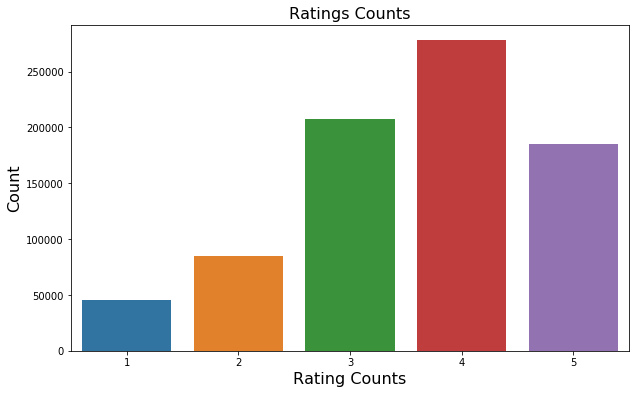

In [187]:
plt.figure(figsize=(10,6))
rating_counts = sns.countplot(x="rating", data=ratings)
plt.title('Ratings Counts', fontsize = 16)
plt.xlabel('Rating Counts', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()